# Mid Test : Apartment Price in Victoria Dataset
### Topik Zulkarnain
***
Background : The Dataset provides living area and conservation status.
There are 218 observations and 16 variables.

Objective : Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to determine the best model and give the reason.

Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.

Instructions :
Download the dataset as a CSV file and place it in your current working directory with the filename "victoria.csv".
1. Import Dataset: Load the dataset.
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.
4. Variable Selection: Choose the variable and its reason.
5. Modelling: Create models using Regression
6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only


### Solution
***

### 1. Load Apartment Price in Victoria Dataset

In [122]:
import pandas as pd
df = pd.read_csv('victoria.csv')

In [123]:
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


#### Before we move on to the next point, as its mention earlier that we must redefining conservation feature to a spesific criteria

In [124]:
#redefining conservation
import numpy as np
arr = []
for i in range(len(df['conservation'])):
    if df['conservation'][i]=='1A':
        arr.append('A')
    elif df['conservation'][i] == '2A':
        arr.append('B')
    else :
        arr.append('C')

In [125]:
df['conservation'] = arr
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,C,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,B,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,A,2,0,1,S4,4A,1


### 2. Exploratory Data Analysis by using python function describe

In [126]:
df.describe()

,row.labels,totalprice,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,280741.522936,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,69298.460578,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,155000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,228500.000000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,269750.000000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,328625.000000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,560000.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


there's a feature that we dont need to use which is rowlabels and area, therefore we'll drop it

In [127]:
df=df.drop(columns=['row.labels','area'])

### 3. Creating a suitable plot of dataset


In [128]:
#import library
import seaborn as sns
import matplotlib.pyplot as plt
#Print all data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 14 columns):
totalprice        218 non-null int64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(8), object(6)
memory usage: 23.9+ KB


since we aiming for help Tony the broker to predict apartment price based on living environment and conservation status, it is pretty obvious to use scatter plot. Scatter plots are used when you want to show the relationship between two variables. Scatter plots are sometimes called correlation plots because they show how two variables are correlated. In order to do that, first we must transform categorical data into numeric by using labelencoder. But other than that, we can still use another plot like pie chart, barplot, boxplot etc. Sometimes its hard to see the pattern / correlation between features, then as an alternatives we'll use heatmap instead, it would become more clearer to see the correllations (see on the nex point).

#### Using pie chart to visualize the proportion of conservation, zone, category, out, streetcategory, and heating

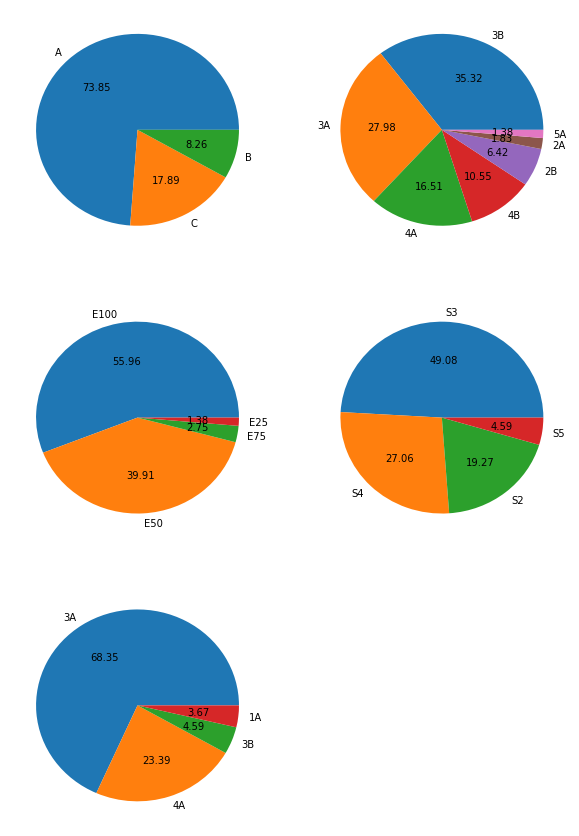

In [156]:
data =['conservation', 'category', 'out', 'streetcategory', 'heating']
fig = plt.figure(figsize = (10,15))
axes = 320
for x in data :
    axes += 1
    fig.add_subplot(axes)
    labels = pd.DataFrame(df[x].value_counts())
    plt.pie(df[x].value_counts(), labels = labels.index, autopct='%.2f')
plt.show()

#### Using boxplot to see the distribustion of totalprice and age

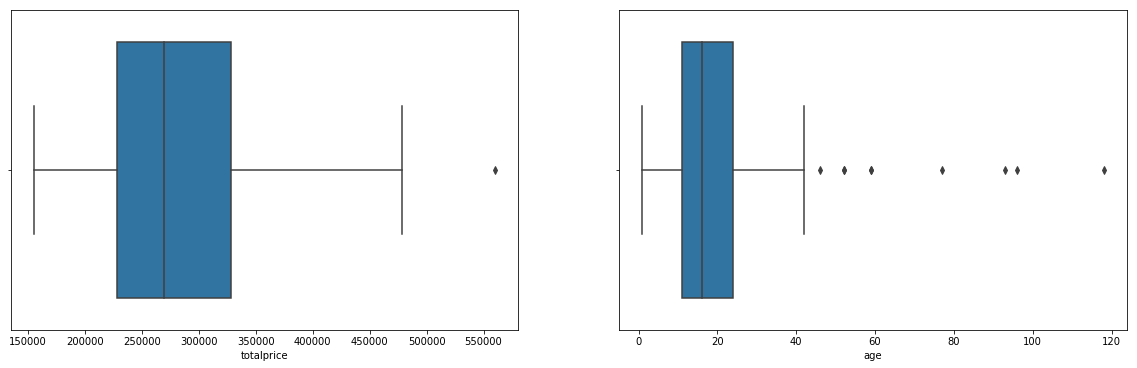

In [159]:
data_numerical = ['totalprice', 'age']
fig = plt.figure(figsize = (20,20))
axes = 320
for num in data_numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num )
plt.show()

#### Using Barplot to visualize the highest total price base on spesific living environment

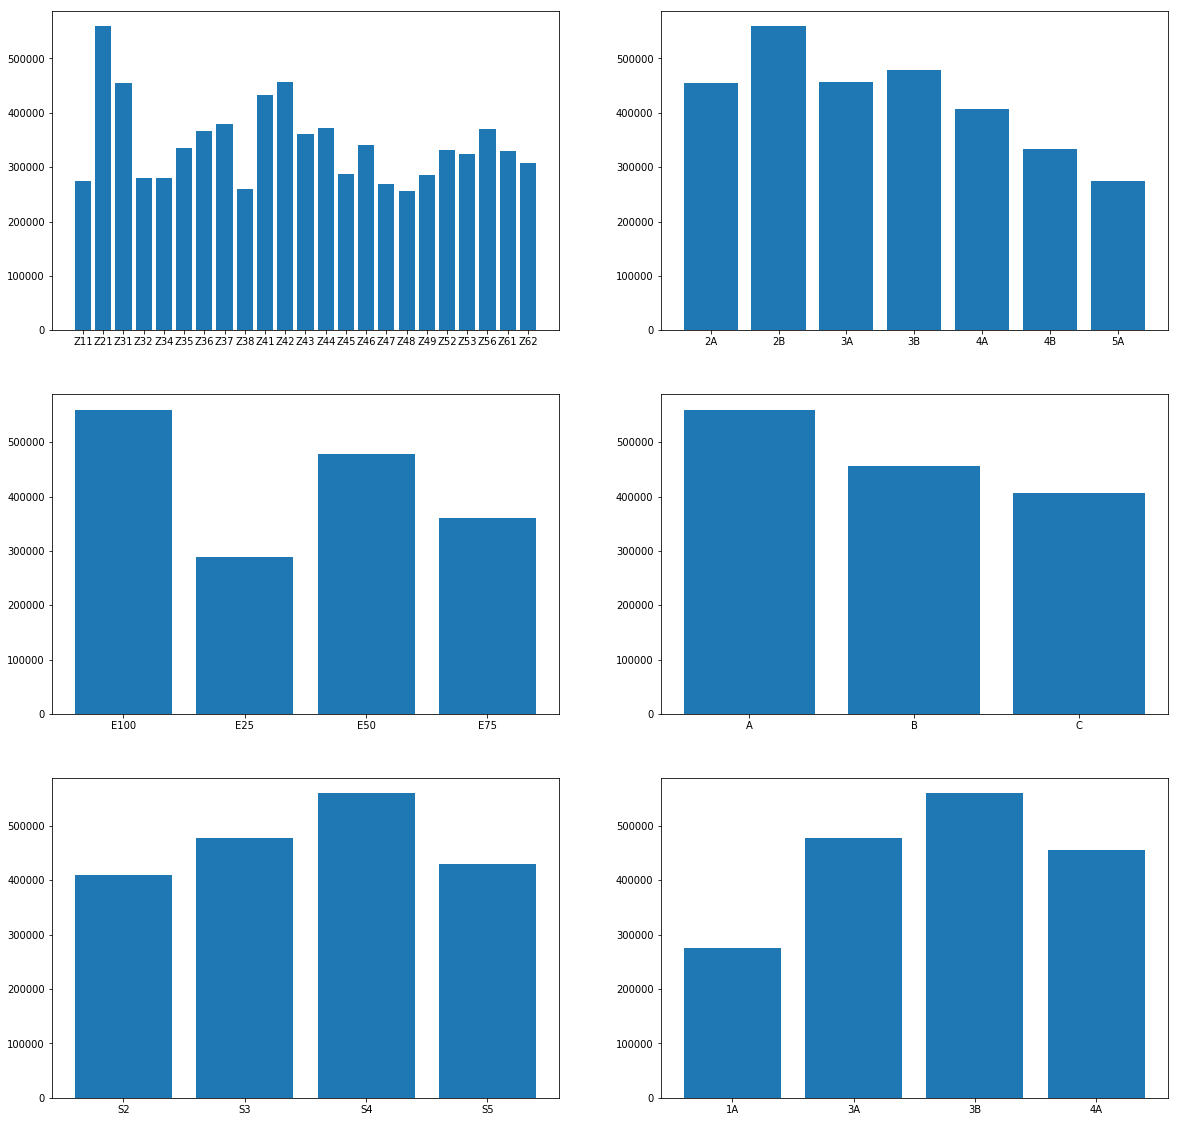

In [165]:
category_apartment = df[['zone', 'category', 'out', 'conservation', 'streetcategory', 'heating']]
fig = plt.figure(figsize = (20,20))
axes = 320
for cat in category_apartment:
    axes += 1
    fig.add_subplot(axes)
    plt.bar(x = cat ,height='totalprice',  data=df )
plt.show()

### 5. Variable Selection and Its Reasons
As I mention earlier, I will visualize the data with heatmap so that we can clear to see what variables/features we need to use to create regression model base on the correlation among variables. First thing first, we need to transform categoric data to numeric data by using labelencoder, while leaving numeric data alone.

In [186]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [187]:
df = MultiColumnLabelEncoder(columns = ['zone','category','out','conservation','streetcategory','heating']).fit_transform(df)

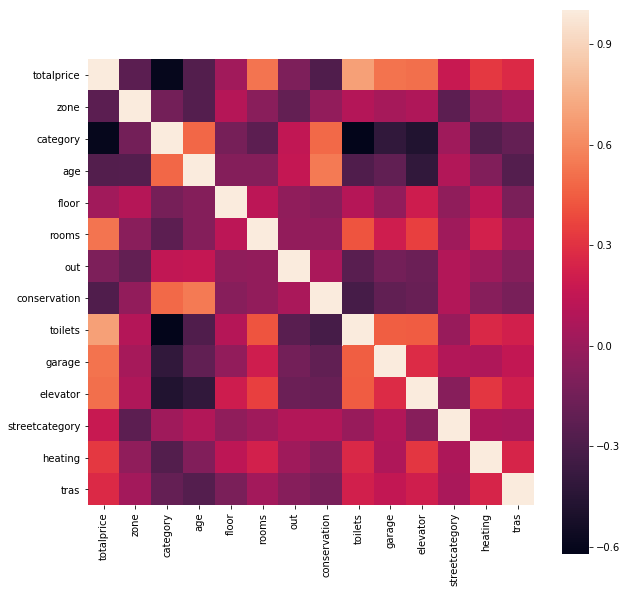

In [188]:
import seaborn as sns
plt.figure(figsize=(10,10))
cor = df.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

from the heatmap above,  variables that most influences the total price is number of rooms, number of toilets, garage, category, and conservation

### 6. Modelling

In [189]:
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
X = df.drop(columns=['totalprice','zone','age','floor','out', 'streetcategory', 'heating', 'tras'])
y = df.totalprice
X= sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             totalprice   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     63.05
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           2.08e-44
Time:                        14:31:28   Log-Likelihood:                -2626.7
No. Observations:                 218   AIC:                             5267.
Df Residuals:                     211   BIC:                             5291.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8.843e+04   2.71e+04      3.263   